In [30]:
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RationalQuadratic, RBF, WhiteKernel, ExpSineSquared, ConstantKernel, Matern
from sklearn.metrics import mean_absolute_error

import matplotlib.pyplot as plt


In [31]:
# Load the dataset
url = 'https://raw.githubusercontent.com/huy164/datasets/master/walmart_stock_price.csv'
df = pd.read_csv(url)

In [32]:
# Filter the data from 2010 to 2022
df['Date'] = pd.to_datetime(df['Date'])
df = df[(df['Date'].dt.year >= 2020) & (df['Date'].dt.year <= 2022)]

In [33]:
# Split the data into train and test sets
train_ratio = 0.8  # Train-test data ratio
train_size = int(len(df) * train_ratio)
train_data = df[:train_size]
test_data = df[train_size:]

In [34]:
# Prepare the training data
X_train = np.arange(len(train_data)).reshape(-1, 1)
y_train = train_data['Close']

# Prepare the test data
X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)
y_test = test_data['Close']

In [35]:
# Define and train the GPR model
# kernel = RationalQuadratic(alpha=5.0, length_scale=10.0, alpha_bounds=(1e-5, 1e5))
kernel = RationalQuadratic() + ExpSineSquared()
model = GaussianProcessRegressor(kernel=kernel)
model.fit(X_train, y_train)

GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1) + ExpSineSquared(length_scale=1, periodicity=1))

In [36]:
# Make predictions
y_pred, sigma = model.predict(X_test, return_std=True)

In [37]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE & MAPE
rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', rmse)

mape = mean_absolute_error(y_test, y_pred) / sum(y_test) * 100
print('Testing MAPE:', mape, '%')

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print("Testing MAE:", mae)

Testing RMSE: 49.176725346942085
Testing MAPE: 0.131411146293879 %
Testing MAE: 43.33063102676419


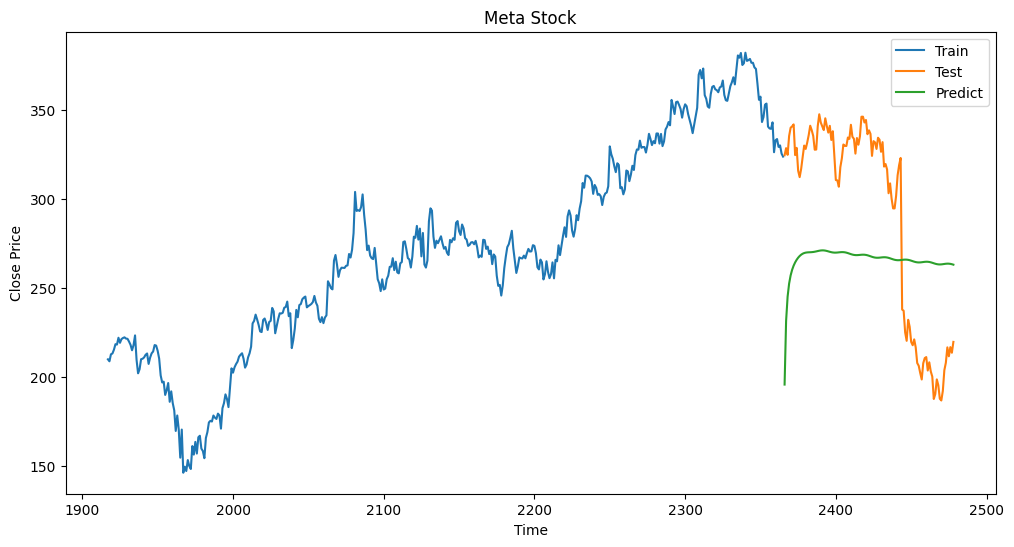

In [38]:
# Plotting the training, test, and predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index[:train_size], df['Close'][:train_size], label='Train')
plt.plot(df.index[train_size:], df['Close'][train_size:], label='Test')
plt.plot(df.index[train_size:], y_pred * sigma, label='Predict')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Meta Stock')
plt.legend()
plt.show()